In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from astropy import units as u
from astropy import constants as const

#set the default plot parameter
plt_param={'font.family':'serif',
           'font.serif':'Times New Roman',
           'lines.linewidth':1,
           'xtick.labelsize':12,
           'ytick.labelsize':12,
           'axes.labelsize':16,
           'xtick.direction':'in',
           'ytick.direction':'in',
           'font.style':'italic',
           'font.weight':'normal',
           'figure.figsize':[5,5],'xtick.minor.visible':True,
           'ytick.minor.visible':True,
           'xtick.major.size':4,
           'ytick.major.size':4,
           'xtick.minor.size':2,
           'ytick.minor.size':2,
           'xtick.major.width':.8,
           'ytick.major.width':.8,
           'xtick.top':True,
           'ytick.right':True,
           'axes.spines.bottom':True,
           'axes.spines.top':True,
           'axes.spines.left':True,
           'axes.spines.right':True,
           'xtick.bottom':True,
           'xtick.labelbottom':True,
           'ytick.left':True,
           'ytick.labelleft':True}
rcParams.update(plt_param)

In [24]:
dic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/'
arr=np.genfromtxt(dic+'M82_sed.txt',delimiter=',')
wave,flux=arr[:,0]*u.AA,arr[:,1]*(10**25.2)*u.erg/(u.second*u.AA)

#convert luminosity to flux(mJy)
D=12.4*1000000*u.lyr
flux_wave=(flux/(4*np.pi*D**2))
flux_nu=flux_wave*(wave**2)/const.c
flux_nu=flux_nu.to(u.mJy).value
wave=wave.to(u.um).value*3.3

In [30]:
#MAMMOTH flux for different bands
wave_mammoth=np.array([0.36,0.51,0.79,1.1,
                       1.7,2.05,3.1,4.9,10.2,
                       20,450,850])
flux_mammoth=np.array([2.1*1e-4,7.6*1e-4,7.9*1e-4,
               30.9*1e-4,79.7*1e-4,113.4*1e-4,
               0.061,0.087,0.22,1.3,17,4.6])
err_mammoth=np.array([0.2e-4,0.4e-4,0.8e-4,2.8e-4,
                      5.1e-4,8.3e-4,0.004,0.008,
                      0.09,.9,10,.9])

flux_mammoth_optical=flux_mammoth[:6]
wave_mammoth_optical=wave_mammoth[:6]
err_mammoth_optical=err_mammoth[:6]

flux_mammoth_aw=flux_mammoth[6:10]
wave_mammoth_aw=wave_mammoth[6:10]
err_mammoth_aw=err_mammoth[6:10]

flux_mammoth_other=flux_mammoth[10:]
wave_mammoth_other=wave_mammoth[10:]
err_mammoth_other=err_mammoth[10:]

#upper limit for mammoth extimate from
#the continuum image of VLA and ALMA
flux_mammoth_up=np.array([5.046032e-2,2.17764965e-2])
wave_mammoth_up=np.array([8565.4988,1998.6163867])

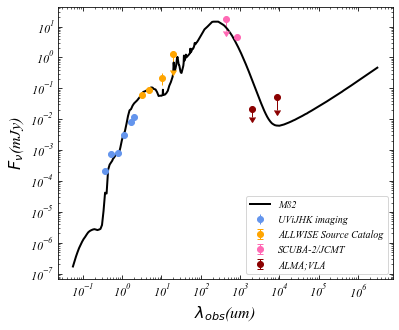

In [32]:
fig,ax=plt.subplots(1,1)
ax.plot(wave,flux_nu,lw=2.,color='black',label='M82')
ax.errorbar(wave_mammoth_optical,flux_mammoth_optical,marker='o',
            yerr=err_mammoth_optical,color='cornflowerblue',
            alpha=1,linestyle='none',label='UViJHK imaging')
ax.errorbar(wave_mammoth_aw,flux_mammoth_aw,
            uplims=np.array([0,0,0,1],dtype=bool),yerr=err_mammoth_aw,
            color='orange',marker='o',alpha=1,linestyle='none'
            ,label='ALLWISE Source Catalog')
ax.errorbar(wave_mammoth_other,flux_mammoth_other,marker='o',
            yerr=err_mammoth_other,color='hotpink',alpha=1,
            uplims=np.array([1,0],dtype=bool),
            linestyle='none',label='SCUBA-2/JCMT')
ax.errorbar(wave_mammoth_up,flux_mammoth_up,
            yerr=np.array([.03,.01]),
            uplims=np.array([1,1],dtype=bool),
            color='darkred',alpha=1,marker='o',
            linestyle='none',label='ALMA;VLA')
ax.set_xlabel(r'$\rm \lambda_{obs}$(um)')
ax.set_ylabel(r'$\rm F_{\nu}$(mJy)')
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend()
dic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/draft_code/paper/ApJtemplate/figs/'
plt.rcParams['figure.figsize'] = [6, 5]
# plt.show()
plt.savefig(dic+'SED_fitting.png',dpi=300)

In [22]:
nu1=35*u.GHz
nu2=150*u.GHz

wave1=(const.c/nu1).to(u.um)
wave2=(const.c/nu2).to(u.um)
print(wave1)
print(wave2)

8565.498800000001 um
1998.6163866666668 um
